In [1]:
import pandas as pd
import os

In [3]:
df_train = pd.read_csv("D:/titanic data set/train.csv")
df_test = pd.read_csv("D:/titanic data set/test.csv")
df_gender = pd.read_csv("D:/titanic data set/gender_submission.csv")

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df_train.shape
df_train["Survived"].value_countsounts()

0    549
1    342
Name: Survived, dtype: int64

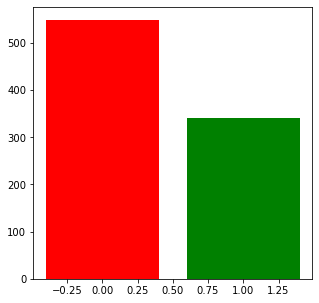

In [31]:
plt.figure(figsize=(5,5))
plt.bar(list(df_train["Survived"].value_counts().keys()),list(df_train["Survived"].value_counts()),color=["red","green"])
plt.show()

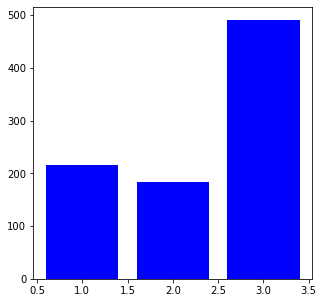

In [29]:
df_train["Pclass"].value_counts()
plt.figure(figsize=(5,5))
plt.bar(list(df_train["Pclass"].value_counts().keys()),list(df_train["Pclass"].value_counts()),color="blue")
plt.show()

In [32]:
df_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

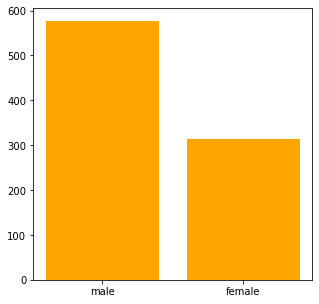

In [34]:
plt.figure(figsize=(5,5))
plt.bar(list(df_train["Sex"].value_counts().keys()),list(df_train["Sex"].value_counts()),color="Orange")
plt.show()

In [35]:
df_train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [36]:
df_train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

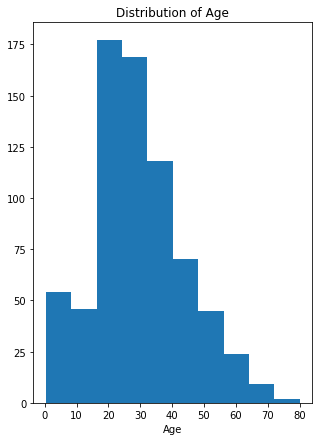

In [37]:
plt.figure(figsize=(5,7))
plt.hist(df_train["Age"])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

In [38]:
sum(df_train["Survived"].isnull())

0

In [39]:
sum(df_train["Age"].isnull())

177

In [40]:
titanic = df_train["Age"].isnull().dropna()

In [42]:
df_train1 = df_train.dropna()

In [43]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [44]:
#building model

In [71]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

In [72]:
rate_women

0.7420382165605095

In [73]:
df_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [75]:
emb_s = df_train.loc[df_train.Embarked == 'S']["Survived"]
rate_s = sum(emb_s)/len(emb_s)
emb_c = df_train.loc[df_train.Embarked == 'C']["Survived"]
rate_c = sum(emb_c)/len(emb_c)
emb_q = df_train.loc[df_train.Embarked == 'Q']["Survived"]
rate_q = sum(emb_q)/len(emb_q)

In [76]:
rate_s

0.38961038961038963

In [77]:
rate_c

0.5535714285714286

In [78]:
rate_q

0.38961038961038963

In [86]:
from sklearn.ensemble import RandomForestClassifier

y = df_train1["Survived"]
features = ["Pclass","Age","Sex","Parch","Fare","Embarked"]
x = pd.get_dummies(df_train1[features])
X_test = pd.get_dummies(df_test1[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x, y)
predictions = model.predict(X_test)

In [87]:
predictions

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [105]:
output = pd.DataFrame({'PassengerId': df_test1.PassengerId, 'Survived_pred': predictions})

In [106]:
output

,PassengerId,Survived_pred
12,904,1
14,906,1
24,916,1
26,918,1
28,920,0
...,...,...
404,1296,0
405,1297,0
407,1299,0
411,1303,1


In [107]:
output.to_csv('my_submission.csv', index=False)

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [109]:
df_merge = pd.merge(output,df_gender,on="PassengerId")

In [110]:
df_merge

,PassengerId,Survived_pred,Survived
0,904,1,1
1,906,1,1
2,916,1,1
3,918,1,1
4,920,0,0
...,...,...,...
82,1296,0,0
83,1297,0,0
84,1299,0,0
85,1303,1,1
